In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tqdm import tqdm

import cv2
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
import plotly.express as px

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Load Data

In [3]:
class_names = ['Rendah', 'Sedang', 'Tinggi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names_label)
nb_classes = len(class_names)

IMAGE_SIZE = (640, 360)


{'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}


In [4]:
def load_data():
    
    datasets = ['train', 'val']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'uint8')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [135]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|██████████| 83/83 [00:00<00:00, 98.50it/s] 


Loading val


100%|██████████| 19/19 [00:00<00:00, 104.19it/s]


In [138]:
all_images = np.concatenate((train_images, test_images), axis=0)
all_images.shape

(334, 360, 640, 3)

In [6]:
train_images = train_images/255
test_images = test_images/255

In [7]:
X = train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]*train_images.shape[3])
print('ukuran data train (fitur):', X.shape)

X_scaling = StandardScaler().fit_transform(X)

ukuran data train (fitur): (267, 691200)


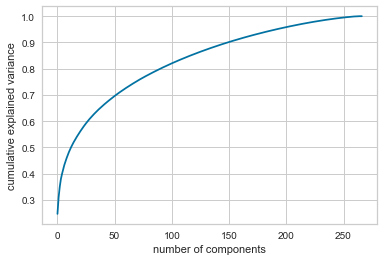

In [8]:
pca = PCA().fit(X_scaling)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

dimensi data setelah PCA: (267, 200)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


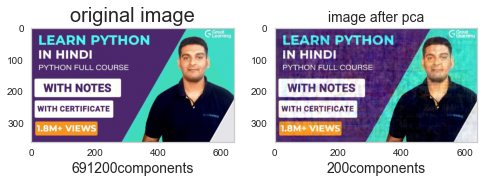

In [9]:
pca = PCA(n_components=200, random_state=10)
X_pca = pca.fit_transform(X)
print('dimensi data setelah PCA:', X_pca.shape)

approximation = pca.inverse_transform(X_pca)
plt.figure(figsize=(8,4))
n = 200
plt.subplot(1, 2, 1)
plt.imshow(X[n].reshape(train_images.shape[1], train_images.shape[2], train_images.shape[3]), cmap=plt.get_cmap('gray'))
plt.xlabel(str(X.shape[1])+'components', fontsize = 14)
plt.title('original image', fontsize = 20)
plt.grid(False)
plt.subplot(1, 2, 2)
plt.imshow(approximation[n].reshape(train_images.shape[1], train_images.shape[2], train_images.shape[3]), cmap=plt.get_cmap('gray'))
plt.xlabel(str(X_pca.shape[1])+'components', fontsize = 14)
plt.title('image after pca', fontsize = 14)
plt.grid(False)
plt.show()

# Clustering Images

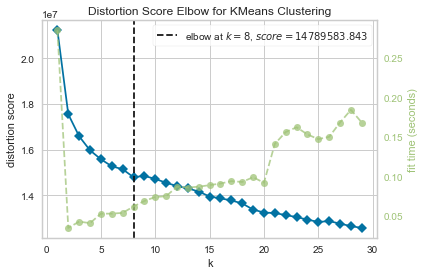

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
visualizer = KElbowVisualizer(KMeans(random_state=10, max_iter = 3000), k=(1,30))

visualizer.fit(X_pca)
visualizer.show()

In [11]:
klaster = 8

## K-Means

In [105]:
kmeans = KMeans(n_clusters=klaster, n_jobs=-1, random_state=21, max_iter = 1000)
kmeans.fit(X_pca)

y_kmeans = kmeans.fit_predict(X_pca)

ss_kmeans = silhouette_score(X_pca, kmeans.labels_)
print('silhouette score:', ss_kmeans)
dbs_kmeans = davies_bouldin_score(X_pca, kmeans.labels_)
print('davies bouldin score:',dbs_kmeans)

silhouette score: 0.05525984505431205
davies bouldin score: 2.5456414930195965


c:\Users\farras\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

c:\Users\farras\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



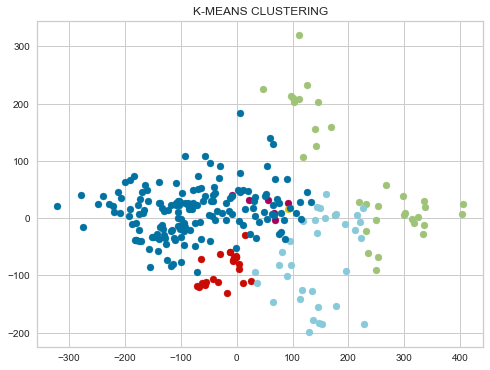

In [13]:
plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_kmeans)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_kmeans == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('K-MEANS CLUSTERING')
plt.show()

## DBSCAN

In [14]:
db = DBSCAN(eps=0.5)
db.fit(X_pca)

y_db = db.fit_predict(X_pca)

ss_db = silhouette_score(X_pca, db.labels_)
print('silhouette score:', ss_db)
dbs_db = davies_bouldin_score(X_pca, db.labels_)
print('davies bouldin score:',dbs_db)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

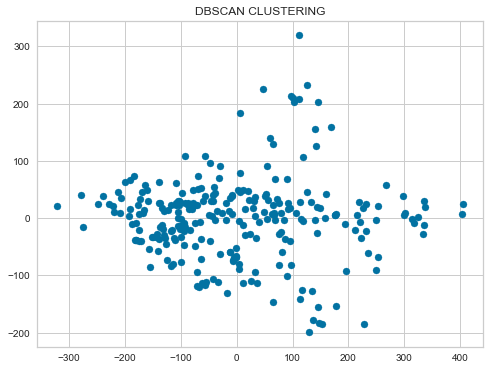

In [ ]:

plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_db)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_db == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('DBSCAN CLUSTERING')
plt.show()

## BIRCH

In [ ]:
brc = Birch(n_clusters=klaster)
brc.fit(X_pca)

y_brc = brc.fit_predict(X_pca)

ss_brc = silhouette_score(X_pca, brc.labels_)
print('silhouette score:', ss_brc)
dbs_brc = davies_bouldin_score(X_pca, brc.labels_)
print('davies bouldin score:',dbs_brc)

silhouette score: 0.03558812198136955
davies bouldin score: 2.754112418615492


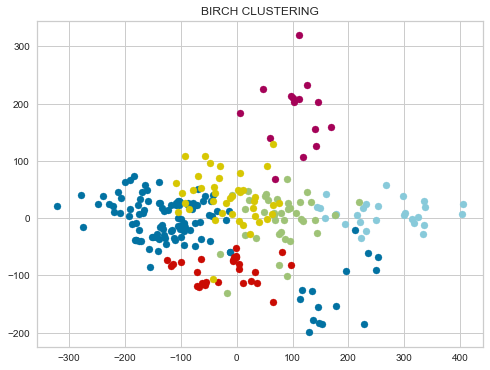

In [ ]:
plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_brc)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_brc == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('BIRCH CLUSTERING')
plt.show()

## Mean Shift

In [ ]:
ms = MeanShift()
ms.fit(X_pca)

y_ms = ms.fit_predict(X_pca)

ss_ms = silhouette_score(X_pca, ms.labels_)
print('silhouette score:', ss_ms)
dbs_ms = davies_bouldin_score(X_pca, ms.labels_)
print('davies bouldin score:',dbs_ms)

silhouette score: 0.16687995221940483
davies bouldin score: 1.9451105064578762


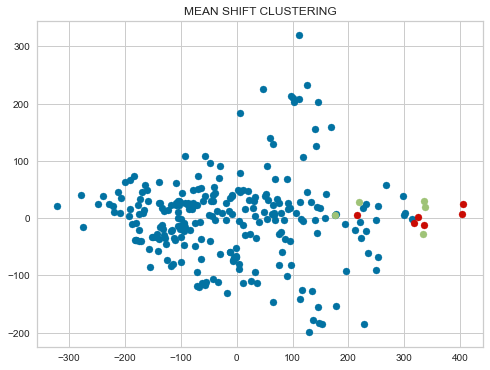

In [ ]:
plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_ms)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_ms == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('MEAN SHIFT CLUSTERING')
plt.show()

## Agglomerative

In [ ]:
aglo = AgglomerativeClustering()
aglo.fit(X_pca)

y_aglo = aglo.fit_predict(X_pca)

ss_aglo = silhouette_score(X_pca, aglo.labels_)
print('silhouette score:', ss_aglo)
dbs_aglo = davies_bouldin_score(X_pca, aglo.labels_)
print('davies bouldin score:',dbs_aglo)

silhouette score: 0.11920559729861309
davies bouldin score: 2.2852975563970617


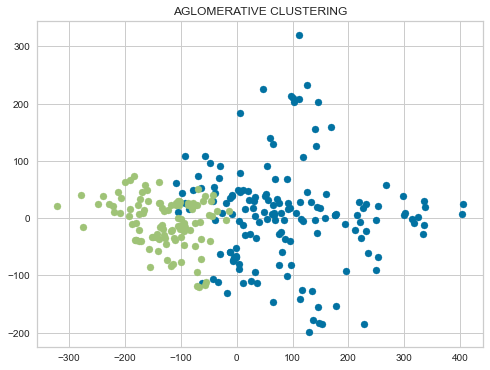

In [ ]:
plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_aglo)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_aglo == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('AGLOMERATIVE CLUSTERING')
plt.show()

## OPTICS

In [ ]:
opt = OPTICS(min_samples=6)
opt.fit(X_pca)

y_opt = opt.fit_predict(X_pca)

ss_opt = silhouette_score(X_pca, opt.labels_)
print('silhouette score:', ss_opt)
dbs_opt = davies_bouldin_score(X_pca, opt.labels_)
print('davies bouldin score:',dbs_opt)

silhouette score: -0.12879157544809425
davies bouldin score: 1.497693071695084


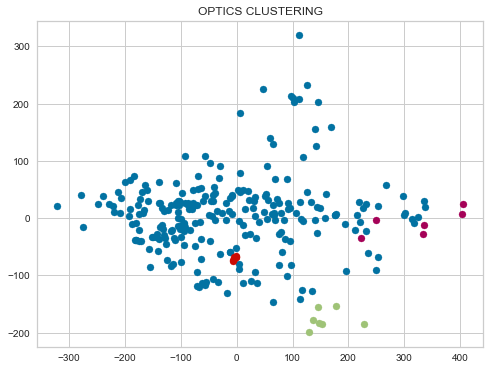

In [ ]:
plt.figure(figsize=(8, 6))
# retrieve unique clusters
clusters = np.unique(y_opt)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_opt == cluster)
    # create scatter of these samples
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1])
# show the plot
plt.title('OPTICS CLUSTERING')
plt.show()

# Clustering Image Aspects

In [193]:
df_element_raw = pd.read_csv('data_regresi.csv')
df_element_raw.head(5)

,Unnamed: 0,name,Detail Views,path,brightness,complexity,colorfulness,quality
0,0,#NAME?,1808,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,88725.81179,0.945532,47.368014,66.266367
1,1,#NAME?,18463,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,118500.18030,0.981748,102.496555,69.953966
2,2,#NAME?,249561,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,106622.88220,0.971479,96.841696,69.560888
3,3,-Sgw-6a1HjU.jpg,13040,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,108188.62450,0.976740,58.850563,87.025152
4,4,#NAME?,2231004,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,123443.47030,0.916993,81.369034,28.305001


In [194]:
br = pd.read_csv(r"C:\Users\farras\Downloads\data_regresi.csv")
br.head(5)

,Unnamed: 0,name,Detail Views,path,brightness,complexity,colorfulness,quality,BRISQUE
0,0,-BOBedcjySI.jpg,1808,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,88725.811789,0.945532,47.368014,1.0,66.266367
1,1,-FXLwjugI_Q.jpg,18463,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,118500.180335,0.981748,102.496555,1.0,69.953966
2,2,-pEs-Bss8Wc.jpg,249561,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,106622.882165,0.971479,96.841696,1.0,69.560888
3,3,-Sgw-6a1HjU.jpg,13040,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,108188.624456,0.976740,58.850563,1.0,87.025152
4,4,-VDXBHLU8q4.jpg,2231004,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,123443.470298,0.916993,81.369034,1.0,28.305001


In [195]:
df_element_raw['name'] = br['name']
df_element_raw

,Unnamed: 0,name,Detail Views,path,brightness,complexity,colorfulness,quality
0,0,-BOBedcjySI.jpg,1808,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,88725.81179,0.945532,47.368014,66.266367
1,1,-FXLwjugI_Q.jpg,18463,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,118500.18030,0.981748,102.496555,69.953966
2,2,-pEs-Bss8Wc.jpg,249561,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,106622.88220,0.971479,96.841696,69.560888
3,3,-Sgw-6a1HjU.jpg,13040,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,108188.62450,0.976740,58.850563,87.025152
4,4,-VDXBHLU8q4.jpg,2231004,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,123443.47030,0.916993,81.369034,28.305001
...,...,...,...,...,...,...,...,...
329,329,_qxhff3mHZc.jpg,67141,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,118121.38360,0.971240,85.088142,30.148732
330,330,_rQ3QHhWlAc.jpg,221,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,54470.41021,0.919883,68.201730,54.955700
331,331,_xf1TMs0ysk.jpg,337069,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,137108.35390,0.960365,53.258169,45.580416
332,332,_ZnxE3bRAVQ.jpg,21069,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,187839.09490,0.954151,71.528870,48.260615


In [196]:
df_element = df_element_raw.drop(['Unnamed: 0', 'name','path'], axis=1)
df_element.head()

,Detail Views,brightness,complexity,colorfulness,quality
0,1808,88725.81179,0.945532,47.368014,66.266367
1,18463,118500.18030,0.981748,102.496555,69.953966
2,249561,106622.88220,0.971479,96.841696,69.560888
3,13040,108188.62450,0.976740,58.850563,87.025152
4,2231004,123443.47030,0.916993,81.369034,28.305001


In [197]:
df_element_with_name = df_element.sort_values(by='Detail Views', ascending=False).iloc[3:, :]
df_element_with_name['name'] = df_element_raw['name']
df_element_with_name.reset_index(inplace=True, drop=True)
df_element_with_name

,Detail Views,brightness,complexity,colorfulness,quality,name
0,4691887,144249.6468,0.951228,84.989364,57.752203,sCOw5y1RQpY.jpg
1,4449284,101816.8972,0.980235,111.204768,47.605475,79pKwdiqcwI.jpg
2,4284903,117064.3188,0.968915,102.094053,47.573347,T936yTchDck.jpg
3,4128274,79834.4876,0.977067,72.403879,86.096446,kWiCuklohdY.jpg
4,3830631,141586.1376,0.945915,88.020428,27.639924,vLqTf2b6GZw.jpg
...,...,...,...,...,...,...
326,126,115046.7800,0.976503,83.203859,70.149447,cu0JGmTiCtY.jpg
327,117,157443.8432,0.976025,94.809080,51.038717,nIuQu9LhNoA.jpg
328,115,116610.2633,0.960791,128.565656,76.331611,YmWg9ygpjFc.jpg
329,111,191104.8434,0.987205,57.224614,91.244341,nfHkVoEoc2s.jpg


In [198]:
df_element = df_element.sort_values(by='Detail Views', ascending=False).iloc[3:, :]
df_element.reset_index(inplace=True, drop=True)
df_element

,Detail Views,brightness,complexity,colorfulness,quality
0,4691887,144249.6468,0.951228,84.989364,57.752203
1,4449284,101816.8972,0.980235,111.204768,47.605475
2,4284903,117064.3188,0.968915,102.094053,47.573347
3,4128274,79834.4876,0.977067,72.403879,86.096446
4,3830631,141586.1376,0.945915,88.020428,27.639924
...,...,...,...,...,...
326,126,115046.7800,0.976503,83.203859,70.149447
327,117,157443.8432,0.976025,94.809080,51.038717
328,115,116610.2633,0.960791,128.565656,76.331611
329,111,191104.8434,0.987205,57.224614,91.244341


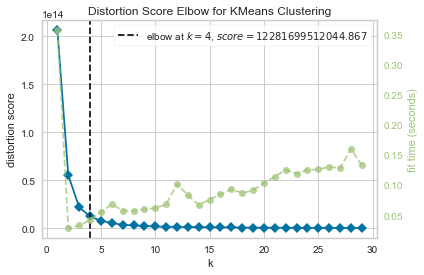

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [199]:
visualizer = KElbowVisualizer(KMeans(random_state=10, max_iter = 3000), k=(1,30))

visualizer.fit(df_element)
visualizer.show()

In [200]:
# df_elemen_used = df_element[['brightness', 'complexity', 'colorfulness', 'quality']]
klaster2 = 4

## K-Means

In [201]:
kmeans2 = KMeans(n_clusters=klaster2, random_state=21, max_iter = 1000, n_init=50)
kmeans2.fit(df_element)

y_kmeans2 = kmeans2.fit_predict(df_element)
clusters_label_kmeans = kmeans2.labels_

ss_kmeans2 = silhouette_score(df_element, kmeans2.labels_)
print('silhouette score:', ss_kmeans2)
dbs_kmeans2 = davies_bouldin_score(df_element, kmeans2.labels_)
print('davies bouldin score:',dbs_kmeans2)

silhouette score: 0.7610182773489061
davies bouldin score: 0.44725196396021044


In [202]:
pca = PCA(n_components=2, random_state=100)
pca_vecs = pca.fit_transform(df_element)

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

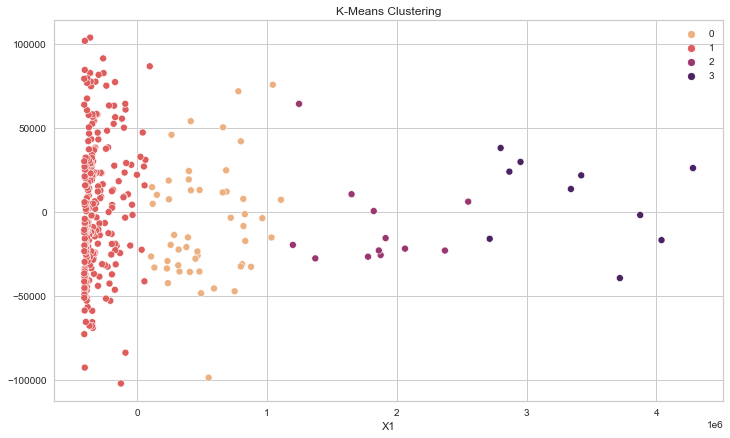

In [203]:
plt.figure(figsize=(12,7)) #ukuran gambar 

plt.title('K-Means Clustering') # judul
plt.xlabel('X0') # label X
plt.xlabel('X1') # label Y

sns.scatterplot(x = x0, y = x1,  hue=clusters_label_kmeans, palette='flare') # buat scatterplot
plt.show() 

## DBSCAN

In [204]:
# db = DBSCAN(eps=0.3, min_samples=2, algorithm='ball_tree')
# db.fit(df_element)

# y_db = db.fit_predict(df_element)
# clusters_label = db.labels_

# ss_db = silhouette_score(df_element, db.labels_)
# print('silhouette score:', ss_db)
# dbs_db = davies_bouldin_score(df_element, db.labels_)
# print('davies bouldin score:',dbs_db)

## BIRCH

In [205]:
brc2 = Birch(n_clusters=klaster2)
brc2.fit(df_element)

y_brc2 = brc2.fit_predict(df_element)
clusters_label_brc = brc2.labels_

ss_brc2 = silhouette_score(df_element, brc2.labels_)
print('silhouette score:', ss_brc2)
dbs_brc2 = davies_bouldin_score(df_element, brc2.labels_)
print('davies bouldin score:',dbs_brc2)

silhouette score: 0.7721723307926347
davies bouldin score: 0.4378411617457118


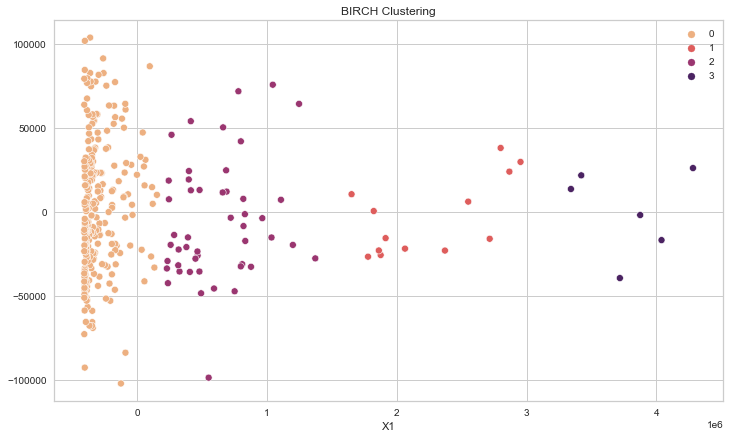

In [206]:
plt.figure(figsize=(12,7)) #ukuran gambar 

plt.title('BIRCH Clustering') # judul
plt.xlabel('X0') # label X
plt.xlabel('X1') # label Y

sns.scatterplot(x = x0, y = x1,  hue=clusters_label_brc, palette='flare') # buat scatterplot
plt.show()

## Mean Shift

In [207]:
ms2 = MeanShift()
ms2.fit(df_element)

y_ms2 = ms2.fit_predict(df_element)
clusters_label_ms = ms2.labels_

ss_ms2 = silhouette_score(df_element, ms2.labels_)
print('silhouette score:', ss_ms2)
dbs_ms2 = davies_bouldin_score(df_element, ms2.labels_)
print('davies bouldin score:',dbs_ms2)

silhouette score: 0.7586745258635053
davies bouldin score: 0.4521773301260417


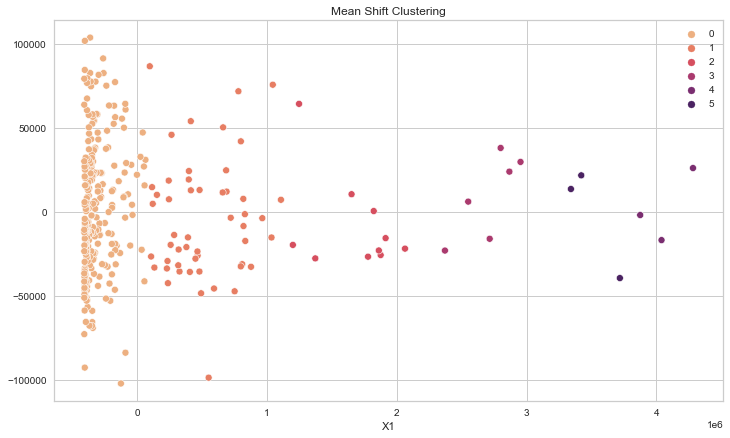

In [208]:
plt.figure(figsize=(12,7)) #ukuran gambar 

plt.title('Mean Shift Clustering') # judul
plt.xlabel('X0') # label X
plt.xlabel('X1') # label Y

sns.scatterplot(x = x0, y = x1,  hue=clusters_label_ms, palette='flare') # buat scatterplot
plt.show() 

## Agglomerative

In [268]:
aglo2 = AgglomerativeClustering(n_clusters=2)
aglo2.fit(df_element)

y_aglo2 = aglo2.fit_predict(df_element)
clusters_label_aglo = aglo2.labels_

ss_aglo2 = silhouette_score(df_element, aglo2.labels_)
print('silhouette score:', ss_aglo2)
dbs_aglo2 = davies_bouldin_score(df_element, aglo2.labels_)
print('davies bouldin score:',dbs_aglo2)

silhouette score: 0.8487121323845791
davies bouldin score: 0.33881775001259185


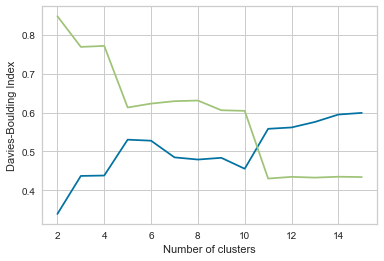

In [274]:
db_results = {}
ss_results = {}

for i in range(2,16):
    aglo2 = AgglomerativeClustering(n_clusters=i)
    labels = aglo2.fit_predict(df_element)
    db_index = davies_bouldin_score(df_element, labels)
    ss_index = silhouette_score(df_element, labels)
    db_results.update({i: db_index})
    ss_results.update({i: ss_index})
    
plt.plot(list(db_results.keys()), list(db_results.values()))
plt.plot(list(ss_results.keys()), list(ss_results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

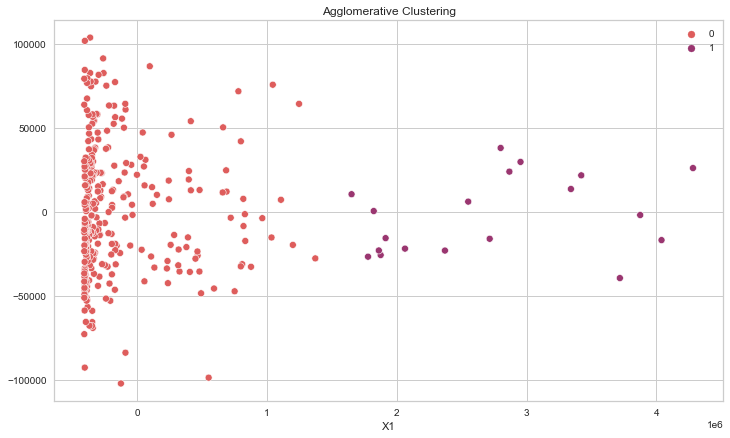

In [210]:
plt.figure(figsize=(12,7)) #ukuran gambar 

plt.title('Agglomerative Clustering') # judul
plt.xlabel('X0') # label X
plt.xlabel('X1') # label Y

sns.scatterplot(x = x0, y = x1,  hue=clusters_label_aglo, palette='flare') # buat scatterplot
plt.show() 

## OPTICS

In [211]:
opt2 = OPTICS(min_samples=3)
opt2.fit(df_element)

y_opt2 = opt2.fit_predict(df_element)
clusters_label_opt2 = opt2.labels_

ss_opt2 = silhouette_score(df_element, opt2.labels_)
print('silhouette score:', ss_opt2)
dbs_opt2 = davies_bouldin_score(df_element, opt2.labels_)
print('davies bouldin score:',dbs_opt2)

silhouette score: 0.14539119313299784
davies bouldin score: 2.323655025565199


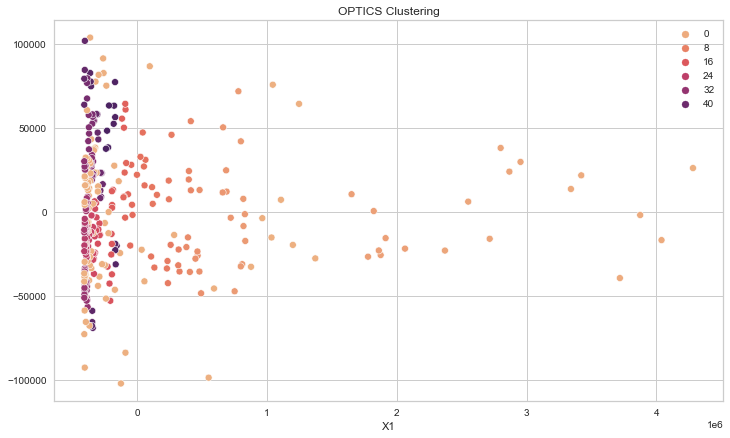

In [212]:
plt.figure(figsize=(12,7)) #ukuran gambar 

plt.title('OPTICS Clustering') # judul
plt.xlabel('X0') # label X
plt.xlabel('X1') # label Y

sns.scatterplot(x = x0, y = x1,  hue=clusters_label_opt2, palette='flare') # buat scatterplot
plt.show() 

In [213]:
df_resume = pd.DataFrame({'Algorithm': ['K-means', 'BIRCH', 'Mean Shift', 'Agglomerative', 'OPTICS'],
                            'Shiloute Score': [ss_kmeans2, ss_brc2, ss_ms2, ss_aglo2, ss_opt2],
                            'DBI': [dbs_kmeans2, dbs_brc2, dbs_ms2, dbs_aglo2, dbs_opt2]})
df_resume

,Algorithm,Shiloute Score,DBI
0,K-means,0.761018,0.447252
1,BIRCH,0.772172,0.437841
2,Mean Shift,0.758675,0.452177
3,Agglomerative,0.848712,0.338818
4,OPTICS,0.145391,2.323655


# Analyze Cluster Result

In [214]:
scaler = MinMaxScaler()
array_element_scaled = scaler.fit_transform(df_element)
df_element_scaled = pd.DataFrame(array_element_scaled, 
                                    columns=df_element.columns)
df_element_scaled['cluster'] = clusters_label_aglo
df_element_scaled['name'] = df_element_with_name['name']
df_element_scaled.head()

,Detail Views,brightness,complexity,colorfulness,quality,cluster,name
0,1.000000,0.579829,0.750271,0.515329,0.548623,1,sCOw5y1RQpY.jpg
1,0.948292,0.374306,0.908358,0.692759,0.452957,1,79pKwdiqcwI.jpg
2,0.913256,0.448157,0.846662,0.631096,0.452654,1,T936yTchDck.jpg
3,0.879872,0.267835,0.891090,0.430149,0.815859,1,kWiCuklohdY.jpg
4,0.816433,0.566928,0.721312,0.535844,0.264717,1,vLqTf2b6GZw.jpg


In [247]:
cluster0 = df_element_scaled.loc[df_element_scaled['cluster'] == 0, ('name')].values.tolist()
cluster1 = df_element_scaled.loc[df_element_scaled['cluster'] == 1, ('name')].values.tolist()
len(cluster0)

312

In [249]:
def display_examples(image_list):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(len(image_list)):
        # print(image_list[i])
        # plt.subplot(len(image_list)/5, 5 ,i+1)
        fig.add_subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        g = cv2.imread('train+val/'+image_list[i])
        g = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
        g = cv2.resize(g, IMAGE_SIZE) 
        plt.imshow(g, cmap=plt.cm.binary)
        # plt.xlabel(class_names[labels[i]])
    plt.show()

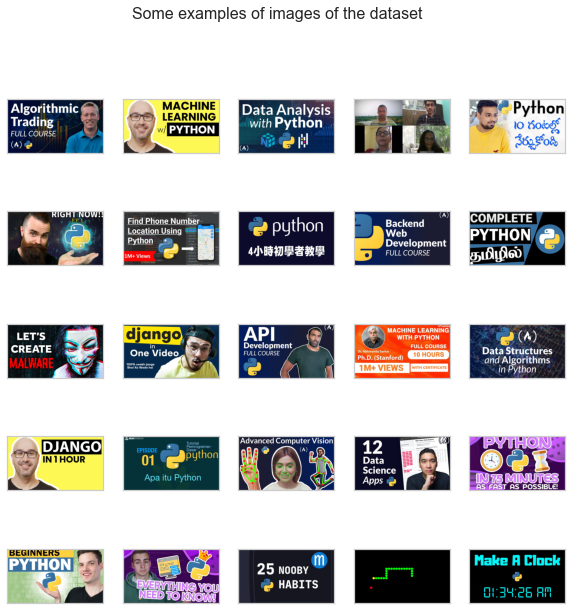

In [251]:
display_examples(cluster0[:25])

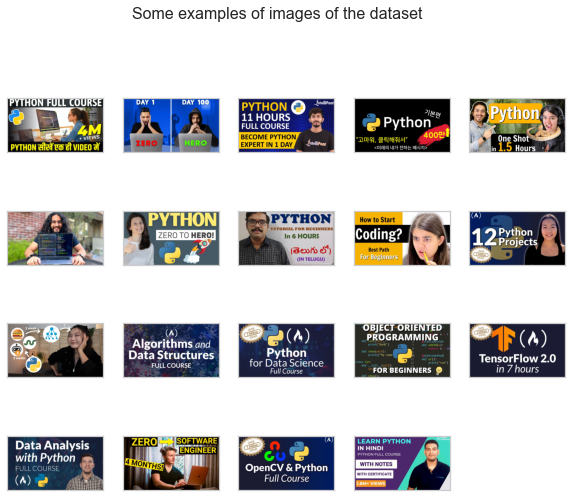

In [252]:
display_examples(cluster1)

In [228]:
df_element_scaled_aglo = pd.DataFrame(array_element_scaled, 
                                    columns=df_element.columns)
df_element_scaled_aglo['cluster'] = clusters_label_aglo

In [229]:
fig2 = px.scatter_3d(df_element, x="brightness", y="complexity",z="colorfulness",
                        color="quality",size="Detail Views")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [244]:
polar=df_element_scaled.groupby("cluster").median().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=400,width=600,
                        title='Median of All Variables from Clustering Result')
fig4.show()

In [245]:
polar3=df_element_scaled.drop(['name'], axis=1).groupby("cluster").max().reset_index()
polar3=pd.melt(polar3,id_vars=["cluster"])
fig4 = px.line_polar(polar3, r="value", theta="variable", color="cluster", line_close=True,height=400,width=600,
                        title='Maximum Values of All Variables from Clustering Result')
fig4.show()

In [246]:
polar2=df_element_scaled_aglo.groupby("cluster").std().reset_index()
polar2=pd.melt(polar2,id_vars=["cluster"])
fig4 = px.line_polar(polar2, r="value", theta="variable", color="cluster", line_close=True,height=400,width=600, 
                        title='Standard Deviation of All Variables from Clustering Result')
fig4.show()

In [232]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier

def pretty_print(df):
    return display( HTML(df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict


def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [233]:
cluster_report(df_element, y_aglo2, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
0,0,312,[1.0] (Detail Views <= 1718101.5)
1,1,19,[0.95] (Detail Views > 1718101.5)


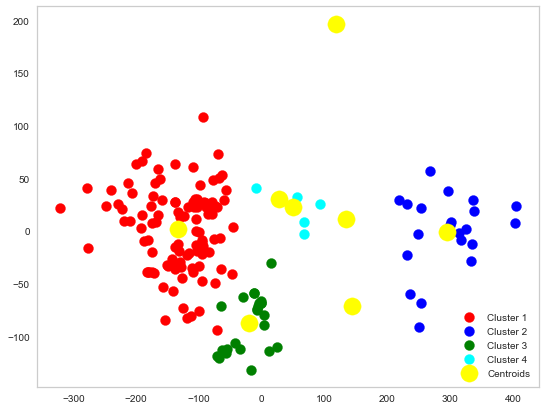

In [234]:
plt.figure(figsize=(9, 7))
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend(loc = 4)
plt.grid(None)
plt.show()